In [ ]:
# Installing 'binance-futures-connector'
# pip install binance-futures-connector
# from binance.futures import Futures 

In [ ]:
# Installing 'Binance_Futures_python' ## Not Required
# # !git clone https://github.com/Binance-docs/Binance_Futures_python.git
# # print('cloned')
# # python3 setup.py install
# import binance_f  # For perpetual swap
# import binance_d  # For delivery futures

# USDT-M Futures - fapi.binance.com
# COIN-M Delivery -  dapi.binance.com

In [14]:
API_Key_M = 'xdWvQvOpiVXPgeY8CbO0RnfH7uzqEi0gkMvffvKnUWGzyu64BqRFJG4aH9NuHRUk'
Secret_Key_M = '7xzQLrWZncOQpiq9aUIb99n9WN0dbtcPFKMl1U9TirZdBq8JgfpI3dTzyiHyzR6q'
API_Key_T = '1d686436da90782146a9bb4fc13f5fa2f56bc05a336702884b142bef5be8c6cd' # Testnet futures https://testnet.binancefuture.com/en/futures/BTCUSDT
Secret_Key_T = 'cdd334a99ec258c0f6ad69734d08ff11791b728b2d1ac624bea3c5d4eea3b3b9'

from binance.lib.utils import check_required_parameters
from binance.futures import Futures as Client
import pandas as pd
import time
import winsound
pd.set_option('display.max_rows', None);
from binance.futures import Futures ;
from binance.futures import Futures as Client
from binance.lib.utils import config_logging

# import logging
# config_logging(logging, logging.DEBUG)

# https://www.youtube.com/watch?v=hZIZMMcTQ8c&ab_channel=MartinMayer
# !pip install TA-Lib
from technical.indicators import *
from technical import *

client = Futures()

In [ ]:
Signature: client.new_order(symbol: str, side: str, type: str, **kwargs)
Docstring:
|
| **New Order (TRADE)**
| *Send a new order*

:API endpoint: ``POST /fapi/v1/order``
:API doc: https://binance-docs.github.io/apidocs/futures/en/#new-order-trade

:parameter symbol: string
:parameter side: string
:parameter type: string
:parameter positionSide: optional string. Default BOTH for One-way Mode; LONG or SHORT for Hedge Mode. It must be passed in Hedge Mode.
:parameter timeInForce: optional string
:parameter quantity: optional float
:parameter reduceOnly: optional string
:parameter price: optional float
:parameter newClientOrderId: optional string. An unique ID among open orders. Automatically generated if not sent.
:parameter stopPrice: optional float. Use with STOP/STOP_MARKET or TAKE_PROFIT/TAKE_PROFIT_MARKET orders.
:parameter closePosition: optional string. true or false; Close-All, use with STOP_MARKET or TAKE_PROFIT_MARKET.
:parameter activationPrice: optional float. Use with TRAILING_STOP_MARKET orders, default is the latest price (supporting different workingType).
:parameter callbackRate: optional float. Use with TRAILING_STOP_MARKET orders, min 0.1, max 5 where 1 for 1%.
:parameter workingType: optional string. stopPrice triggered by: "MARK_PRICE", "CONTRACT_PRICE". Default "CONTRACT_PRICE".
:parameter priceProtect: optional string. "TRUE" or "FALSE", default "FALSE". Use with STOP/STOP_MARKET or TAKE_PROFIT/TAKE_PROFIT_MARKET orders.
:parameter newOrderRespType: optional float. "ACK" or "RESULT", default "ACK".
:parameter recvWindow: optional int

In [18]:
'''''''''
This worked and placed one order
'''''''''

client = Futures()
print(client.time())

client = Futures(key=API_Key_T, secret=Secret_Key_T, base_url= "https://testnet.binancefuture.com")

# Get account information
print(client.account(), "- is this printed")

# Post a new order
params = {
    'symbol': 'BTCUSDT',
    'side': 'BUY',
    'type': 'LIMIT',
    'timeInForce': 'GTC',
    'quantity': 0.002,
    'price': 33000.00,
}

response = client.new_order(**params)
print(response)

{'serverTime': 1652989722717}
{'feeTier': 0, 'canTrade': True, 'canDeposit': True, 'canWithdraw': True, 'updateTime': 0, 'totalInitialMargin': '6.00372345', 'totalMaintMargin': '1.20074469', 'totalWalletBalance': '2999.93401946', 'totalUnrealizedProfit': '8.07446910', 'totalMarginBalance': '3008.00848856', 'totalPositionInitialMargin': '6.00372345', 'totalOpenOrderInitialMargin': '0.00000000', 'totalCrossWalletBalance': '2999.93401946', 'totalCrossUnPnl': '8.07446910', 'availableBalance': '3001.90949601', 'maxWithdrawAmount': '2998.73327477', 'assets': [{'asset': 'BNB', 'walletBalance': '0.00000000', 'unrealizedProfit': '0.00000000', 'marginBalance': '0.00000000', 'maintMargin': '0.00000000', 'initialMargin': '0.00000000', 'positionInitialMargin': '0.00000000', 'openOrderInitialMargin': '0.00000000', 'maxWithdrawAmount': '0.00000000', 'crossWalletBalance': '0.00000000', 'crossUnPnl': '0.00000000', 'availableBalance': '0.00000000', 'marginAvailable': True, 'updateTime': 0}, {'asset': 'U

{'orderId': 3041130142, 'symbol': 'BTCUSDT', 'status': 'NEW', 'clientOrderId': 'TQZJ8gFynwRUWrfIczOCCf', 'price': '33000', 'avgPrice': '0.00000', 'origQty': '0.002', 'executedQty': '0', 'cumQty': '0', 'cumQuote': '0', 'timeInForce': 'GTC', 'type': 'LIMIT', 'reduceOnly': False, 'closePosition': False, 'side': 'BUY', 'positionSide': 'BOTH', 'stopPrice': '0', 'workingType': 'CONTRACT_PRICE', 'priceProtect': False, 'origType': 'LIMIT', 'updateTime': 1652989723662}


In [ ]:
# Getting Details about previous orders
response_order1 = client.query_order('BTCUSDT', orderId=3036728547)
response_order1, response_order1['status']

In [ ]:
# pip install tradingview_ta

In [ ]:
docker run -p 8080:8080 --rm reg2005/tradingview-ta-docker

In [3]:
futures_client = Client()
logging.info(futures_client.ping())

DEBUG:root:url: https://fapi.binance.com/fapi/v1/ping
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): fapi.binance.com:443
DEBUG:urllib3.connectionpool:https://fapi.binance.com:443 "GET /fapi/v1/ping HTTP/1.1" 200 2
DEBUG:root:raw response from server:{}
INFO:root:{}


In [4]:
# Go to Trading View, BTCUSDTPERP (symobl) , exchange (binance)
config_logging(logging, logging.DEBUG)

futures_client = Client()

btcusdt_5m = logging.info(futures_client.klines("BTCUSDT", "5m"))

DEBUG:root:url: https://fapi.binance.com/fapi/v1/klines
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): fapi.binance.com:443
DEBUG:urllib3.connectionpool:https://fapi.binance.com:443 "GET /fapi/v1/klines?symbol=BTCUSDT&interval=5m HTTP/1.1" 200 None
DEBUG:root:raw response from server:[[1652668500000,"30525.00","30542.80","30491.30","30529.10","675.588",1652668799999,"20617644.74940",8963,"351.711","10734564.35160","0"],[1652668800000,"30529.00","30529.10","30414.90","30450.10","1405.770",1652669099999,"42795337.63150",12940,"570.377","17360371.27130","0"],[1652669100000,"30450.20","30451.00","30385.80","30392.00","1061.940",1652669399999,"32292180.05590",11393,"477.827","14530446.92660","0"],[1652669400000,"30392.00","30443.10","30385.00","30434.10","607.276",1652669699999,"18471812.74370",9556,"335.003","10190514.45090","0"],[1652669700000,"30434.20","30510.00","30432.30","30489.70","922.485",1652669999999,"28119462.12890",10273,"572.293","17440937.15530","0"],[165267

INFO:root:[[1652668500000, '30525.00', '30542.80', '30491.30', '30529.10', '675.588', 1652668799999, '20617644.74940', 8963, '351.711', '10734564.35160', '0'], [1652668800000, '30529.00', '30529.10', '30414.90', '30450.10', '1405.770', 1652669099999, '42795337.63150', 12940, '570.377', '17360371.27130', '0'], [1652669100000, '30450.20', '30451.00', '30385.80', '30392.00', '1061.940', 1652669399999, '32292180.05590', 11393, '477.827', '14530446.92660', '0'], [1652669400000, '30392.00', '30443.10', '30385.00', '30434.10', '607.276', 1652669699999, '18471812.74370', 9556, '335.003', '10190514.45090', '0'], [1652669700000, '30434.20', '30510.00', '30432.30', '30489.70', '922.485', 1652669999999, '28119462.12890', 10273, '572.293', '17440937.15530', '0'], [1652670000000, '30489.70', '30518.20', '30462.80', '30490.60', '696.842', 1652670299999, '21249097.41950', 8507, '343.189', '10465894.72760', '0'], [1652670300000, '30490.60', '30490.60', '30389.90', '30417.40', '1231.914', 1652670599999,

In [ ]:
'''''''''
This worked and fetched data correctly
'''''''''
btcbusd_5m=futures_client.klines("BTCBUSD", "5m") # Go to binance, derivatives, usd futures, btcbusd perpetual (https://www.binance.com/en-IN/futures/BTCBUSD)
btcbusd_5m # len(btcbusd_5m) - 500 # 1 day 17 hrsx`

In [ ]:
#1651693800000
btcusdt_5m[::-1][0] # getting lattest data, this candle is not closed,    btcusdt_5m[::-1][0] this candle is closed

In [ ]:
len(btcusdt_5m) # 1 day 17 hrs

In [ ]:
futures_client.klines("BTCUSDT", "5m")

In [ ]:
# output of above
[1651754400000,'39539.20','39540.90','39522.40','39538.30','229.192',1651754699999,'9060381.38510',2996,'123.740','4891750.11680'0'], 
[1651754700000,'39538.40','39550.00','39501.70','39517.90','329.564',1651754999999,'13025930.27350',4104,'177.951','7033420.16680'0'],
#  Open time,	Open,	High,	Low	,Close	,Volume	,Close time,	Quote asset volume	Number of trades	Taker buy base asset volume	Taker buy quote asset volume	Ignore
#  reading output https://github.com/binance/binance-public-data/

In [ ]:
# this function is important def continuous_klines(
# https://github.com/Binance-docs/binance-futures-connector-python/blob/main/binance/futures/market.py

In [ ]:

def continuous_klines(self, pair: str, contractType: str, interval: str, **kwargs):
    """
    |
    | **Continuous Kline/Candlestick Data**
    | *Kline/candlestick bars for a specific contract type. Klines are uniquely identified by their open time.*  
    
    :API endpoint: ``GET /fapi/v1/continuousKlines``
    :API doc: https://binance-docs.github.io/apidocs/futures/en/#continuous-contract-kline-candlestick-data
    :parameter pair: string; the trading pair.
    :parameter contractType: string; PERPETUAL, CURRENT_MONTH, NEXT_MONTH, CURRENT_QUARTER, NEXT_QUARTER.
    :parameter interval: string; the interval of kline, e.g 1m, 5m, 1h, 1d, etc. (see more in https://binance-docs.github.io/apidocs/futures/en/#public-endpoints-info)
    :parameter limit: optional int; limit the results. Default 500, max 1000.
    :parameter startTime: optional int
    :parameter endTime: optional int
    |
    """

    check_required_parameters([[pair, "pair"], [contractType,"contractType"], [interval, "interval"]])
    params = {"pair": pair, "contractType":contractType, "interval": interval, **kwargs}
    return self.query("/fapi/v1/continuousKlines", params)
from binance.futures import Futures as Client
continuous_klines_object = Client()
a= continuous_klines_object.continuous_klines("BTCUSDT","PERPETUAL",  "1m")[::-1][:21] # 1652122500000 lattest

In [55]:
# acessing functions
def ping(self):
    """
    |
    | **Test Connectivity**
    | *Test connectivity to the Rest API.*
    :API endpoint: ``GET /fapi/v1/ping``
    :API doc: https://binance-docs.github.io/apidocs/futures/en/#test-connectivity
    |
    """

    url_path = "/fapi/v1/ping"
    return self.query(url_path)
from binance.futures import Futures as Client
pping = Client()
pping.ping()

{}

In [7]:
continuous_klines_object = Client()

def continuous_klines(self, pair: str, contractType: str, interval: str, **kwargs):
    check_required_parameters([[pair, "pair"], [contractType,"contractType"], [interval, "interval"]])
    params = {"pair": pair, "contractType":contractType, "interval": interval, **kwargs}
    return self.query("/fapi/v1/continuousKlines", params)

def getRawData():
    return continuous_klines_object.continuous_klines("BTCUSDT","PERPETUAL",  "5m")[::-1][:21] # 1652122500000 lattest

In [ ]:
# Run this, it will update after every 1 minute, for this change "5m" to "1m" ^^^^^^ here above
first_time_stamp = 0


while 1:
    Raw_Data = pd.DataFrame(getRawData(),columns=['openTimeStamp','open','high','low','close',0,1,2,3,4,5,6])
    Raw_Data_new = Raw_Data.drop([0,1,2,3,4,5,6], axis = 1)
    if first_time_stamp == Raw_Data_new['openTimeStamp'][0]:
        print('repeat1')
        pass
    else:
        print('repeat2')
        first_time_stamp = Raw_Data_new['openTimeStamp'][0]
        print(Raw_Data_new)
        time.sleep(10) # API is giving sometimes old data

repeat2
    openTimeStamp      open      high       low     close
0   1652299500000  29352.30  29422.80  29175.20  29184.50
1   1652299200000  29360.50  29655.00  29326.00  29352.40
2   1652298900000  29569.00  29597.60  29311.90  29360.50
3   1652298600000  29203.20  29576.30  29200.30  29568.90
4   1652298300000  29297.20  29415.00  29156.50  29203.10
5   1652298000000  29383.90  29480.40  29230.00  29301.90
6   1652297700000  29556.80  29586.00  29300.00  29383.80
7   1652297400000  29739.40  29815.00  29527.60  29556.70
8   1652297100000  29598.10  29862.50  29580.80  29742.40
9   1652296800000  29829.00  29848.90  29570.40  29598.00
10  1652296500000  29779.50  29955.60  29664.00  29828.70
11  1652296200000  29931.80  30042.00  29756.00  29779.40
12  1652295900000  29851.80  29971.60  29780.80  29931.80
13  1652295600000  29904.30  29978.50  29781.80  29851.90
14  1652295300000  29906.00  29956.80  29764.60  29904.40
15  1652295000000  29892.80  29965.20  29842.10  29905.90
16  16

In [29]:
Raw_Data = pd.DataFrame(getRawData(),columns=['openTimeStamp','open','high','low','close',0,1,2,3,4,5,6])
Raw_Datata_new = Raw_Data.drop([0,1,2,3,4,5,6], axis = 1)
print(Raw_Datata_new)

    openTimeStamp      open      high       low     close
0   1652300400000  29182.10  29317.50  29050.60  29234.20
1   1652300100000  29086.50  29493.00  28870.00  29182.20
2   1652299800000  29187.40  29327.40  29071.70  29086.50
3   1652299500000  29352.30  29422.80  29169.90  29187.40
4   1652299200000  29360.50  29655.00  29326.00  29352.40
5   1652298900000  29569.00  29597.60  29311.90  29360.50
6   1652298600000  29203.20  29576.30  29200.30  29568.90
7   1652298300000  29297.20  29415.00  29156.50  29203.10
8   1652298000000  29383.90  29480.40  29230.00  29301.90
9   1652297700000  29556.80  29586.00  29300.00  29383.80
10  1652297400000  29739.40  29815.00  29527.60  29556.70
11  1652297100000  29598.10  29862.50  29580.80  29742.40
12  1652296800000  29829.00  29848.90  29570.40  29598.00
13  1652296500000  29779.50  29955.60  29664.00  29828.70
14  1652296200000  29931.80  30042.00  29756.00  29779.40
15  1652295900000  29851.80  29971.60  29780.80  29931.80
16  1652295600

In [30]:
print('openTimeStamp','  ', "high ",'    ', "low")
for i in range(1,11):
    print(Raw_Datata_new['openTimeStamp'][i],' ',Raw_Datata_new['high'][i], ' ',Raw_Datata_new['low'][i] ,"  ",i)

openTimeStamp    high       low
1652300100000   29493.00   28870.00    1
1652299800000   29327.40   29071.70    2
1652299500000   29422.80   29169.90    3
1652299200000   29655.00   29326.00    4
1652298900000   29597.60   29311.90    5
1652298600000   29576.30   29200.30    6
1652298300000   29415.00   29156.50    7
1652298000000   29480.40   29230.00    8
1652297700000   29586.00   29300.00    9
1652297400000   29815.00   29527.60    10


sum_high 	 sum_low

29493.0000 	 28870.0000 	 1
29327.4000 	 29071.7000 	 2
29422.8000 	 29169.9000 	 3
29655.0000 	 29326.0000 	 4
29597.6000 	 29311.9000 	 5
29576.3000 	 29200.3000 	 6
29415.0000 	 29156.5000 	 7
29480.4000 	 29230.0000 	 8
29586.0000 	 29300.0000 	 9
29815.0000 	 29527.6000 	 10
29536.0000 	 29216.3900 	 Final


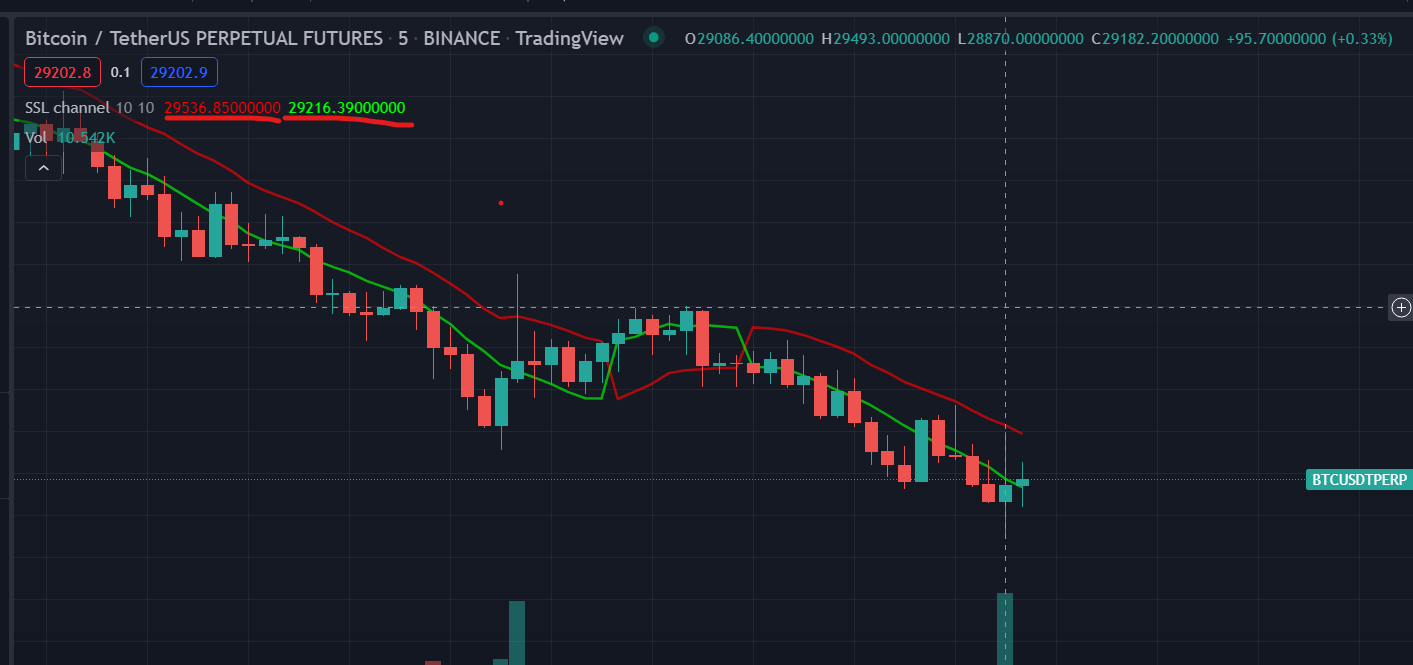

In [45]:
sum_high=0
sum_low=0
print('sum_high','\t','sum_low')
print('')
for i in range(1,11):
    sum_high += float(Raw_Datata_new['high'][i])
    sum_low += float(Raw_Datata_new['low'][i])
    print( "%.4f"%float(Raw_Datata_new['high'][i]),'\t', "%.4f"%float(Raw_Datata_new['low'][i]),'\t',i)
print( "%.4f"%int(sum_high/10),'\t', "%.4f"%float(sum_low/10),'\t','Final')
from IPython.display import Image
Image(filename =r'image.png')

In [8]:
continuous_klines_object500 = Client()

def getRawData500():
    return continuous_klines_object500.continuous_klines("BTCUSDT","PERPETUAL",  "5m")[::-1] # 1652122500000 lattest

In [94]:
# Run this, it will update after every 1 minute, for this change "5m" to "1m" ^^^^^^ here above
first_time_stamp = 0

Raw_Data = pd.DataFrame(getRawData500(),columns=['openTimeStamp','open','high','low','close',0,1,2,3,4,5,6])
Raw_Data_new = Raw_Data.drop([0,1,2,3,4,5,6], axis = 1)
Raw_Data_new['sslHigh']=0
Raw_Data_new['ssllow']=0
for i in range(499):
    sumhigh=0
    sumlow=0
    for j in range(10):
        sumlow += Raw_Data_new['low']
    sumlow=sumlow/10
Raw_Data_new

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [22]:
# Run this, it will update after every 1 minute, for this change "5m" to "1m" ^^^^^^ here above
first_time_stamp = 0

Raw_Data = pd.DataFrame(getRawData500(),columns=['openTimeStamp','open','high','low','close',0,1,2,3,4,5,6])
Raw_Data_new = Raw_Data.drop([0,1,2,3,4,5,6], axis = 1)[:171]
Raw_Data_new['sslHigh']=0
Raw_Data_new['ssllow']=0
Raw_Data_new['high1low0']=0


sumhigh=0
sumlow=0
for i in range(150,0,-1):
    sumhigh=0
    sumlow=0
    for j in range(10):
        
        sumlow+=float(Raw_Data_new['low'][i+j-1])
        sumhigh+=float(Raw_Data_new['high'][i+j-1])

    Raw_Data_new['ssllow'][i-1]=sumhigh/10
    Raw_Data_new['sslHigh'][i-1]=sumlow/10
    if float(Raw_Data_new['ssllow'][i-1]) > float(Raw_Data_new['close'][i-1]):
        Raw_Data_new['high1low0'][i-1] = 0
    else:
        Raw_Data_new['high1low0'][i-1] = 1
#     for j in range(10):
#         Raw_Data_new[i]['sslHigh']
#     for j in range(10):
#         sumlow += float(Raw_Data_new['low'][490-j])
#         Raw_Data_new['ssllow'][490-j]=float(Raw_Data_new['low'][499-j])#float(sumlow/10)
# sumlow=sumlow/10
Raw_Data_new

NameError: name 'getRawData500' is not defined

# Reverse

In [6]:
continuous_klines_object200_reverse = Client()

def getRawData500():
    return continuous_klines_object200_reverse.continuous_klines("BTCUSDT","PERPETUAL",  "5m", limit=200) # 1652122500000 lattest

First_time_stamp = 0

Raw_Data = pd.DataFrame(getRawData500(),columns=['openTimeStamp','open','high','low','close',0,1,2,3,4,5,6])
Raw_Data_new = Raw_Data.drop([0,1,2,3,4,5,6], axis = 1)
Raw_Data_new['sslHigh']=0
Raw_Data_new['ssllow']=0
Raw_Data_new['high1low0']=0
Raw_Data_new['high'] = Raw_Data_new['high'].astype(float)
Raw_Data_new['close'] = Raw_Data_new['close'].astype(float)
Raw_Data_new['open'] = Raw_Data_new['open'].astype(float)
Raw_Data_new['low'] = Raw_Data_new['low'].astype(float)

for i in range(10,len(Raw_Data_new)):
    sumhigh=0
    sumlow=0
    for j in range(-9,1):
        
        sumlow+=(Raw_Data_new['low'][i+j])
        sumhigh+=(Raw_Data_new['high'][i+j])

    Raw_Data_new['ssllow'][i]=sumhigh/10
    Raw_Data_new['sslHigh'][i]=sumlow/10
    if (Raw_Data_new['sslHigh'][i]) > (Raw_Data_new['ssllow'][i]):
        Raw_Data_new['high1low0'][i] = 0
    else:
        Raw_Data_new['high1low0'][i] = 1
#         print(float(Raw_Data_new['sslHigh'][i]), float(Raw_Data_new['close'][i]),Raw_Data_new['openTimeStamp'][i] )
Raw_Data_new

DEBUG:root:url: https://fapi.binance.com/fapi/v1/continuousKlines
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): fapi.binance.com:443
DEBUG:urllib3.connectionpool:https://fapi.binance.com:443 "GET /fapi/v1/continuousKlines?pair=BTCUSDT&contractType=PERPETUAL&interval=5m&limit=200 HTTP/1.1" 200 None
DEBUG:root:raw response from server:[[1652758500000,"30316.10","30500.00","30296.90","30435.20","4994.628",1652758799999,"151916835.12299",35149,"2976.252","90531655.84219","0"],[1652758800000,"30435.20","30435.20","30345.90","30384.30","1426.575",1652759099999,"43357146.62180",16223,"583.160","17725155.48180","0"],[1652759100000,"30384.60","30426.00","30333.00","30415.90","833.618",1652759399999,"25315595.63362",11548,"464.833","14119015.84630","0"],[1652759400000,"30416.00","30488.70","30370.60","30374.00","1509.456",1652759699999,"45942070.00705",16628,"703.231","21407191.64645","0"],[1652759700000,"30374.00","30401.30","30335.90","30341.60","1020.330",1652759999999,"3098

C:\Users\ABHI\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ABHI\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ABHI\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,openTimeStamp,open,high,low,close,sslHigh,ssllow,high1low0
0,1652758500000,30316.1,30500.0,30296.9,30435.2,0,0,0
1,1652758800000,30435.2,30435.2,30345.9,30384.3,0,0,0
2,1652759100000,30384.6,30426.0,30333.0,30415.9,0,0,0
3,1652759400000,30416.0,30488.7,30370.6,30374.0,0,0,0
4,1652759700000,30374.0,30401.3,30335.9,30341.6,0,0,0
5,1652760000000,30341.6,30371.9,30280.0,30281.1,0,0,0
6,1652760300000,30281.2,30320.0,30261.0,30275.2,0,0,0
7,1652760600000,30275.1,30321.9,30270.8,30314.5,0,0,0
8,1652760900000,30314.5,30314.5,30259.2,30281.8,0,0,0
9,1652761200000,30281.8,30292.0,30250.1,30266.4,0,0,0


In [ ]:
'''This is working, dont touch this'''
continuous_klines_object200_reverse = Client()

def getRawData500():
    return continuous_klines_object200_reverse.continuous_klines("ADAUSDT","PERPETUAL",  "5m", limit=1000) # 1652122500000 lattest

First_time_stamp = 0

Raw_Data = pd.DataFrame(getRawData500(),columns=['openTimeStamp','open','high','low','close',0,1,2,3,4,5,6])
Raw_Data_new = Raw_Data.drop([0,1,2,3,4,5,6], axis = 1)
Raw_Data_new['high'] = Raw_Data_new['high'].astype(float)
Raw_Data_new['close'] = Raw_Data_new['close'].astype(float)
Raw_Data_new['open'] = Raw_Data_new['open'].astype(float)
Raw_Data_new['low'] = Raw_Data_new['low'].astype(float)
Raw_Data_new['HL'] = 0
Raw_Data_new['signal'] = 0
Raw_Data_new['sslDown'], Raw_Data_new['sslUp'] = SSLChannels(Raw_Data_new, 10)
count = 0

for i in range(len(Raw_Data_new)):
    if (Raw_Data_new['sslUp'][i] > Raw_Data_new['sslDown'][i]):
        Raw_Data_new['HL'][i] = float(1)
        
for i in range(3, len(Raw_Data_new)):
    if (Raw_Data_new['HL'][i-3] == 0):
        if (Raw_Data_new['HL'][i-2] == 1):
            if (Raw_Data_new['HL'][i-1] == 1):
                if (Raw_Data_new['close'][i-2]) > (Raw_Data_new['open'][i-2]):
                    if (Raw_Data_new['close'][i-1]) > (Raw_Data_new['open'][i-1]):
                        Raw_Data_new['signal'][i] = float(1)
                        count+=1
    if (Raw_Data_new['HL'][i-3] == 1):
        if (Raw_Data_new['HL'][i-2] == 0):
            if (Raw_Data_new['HL'][i-1] == 0):
                if (Raw_Data_new['close'][i-2]) < (Raw_Data_new['open'][i-2]):
                    if (Raw_Data_new['close'][i-1]) < (Raw_Data_new['open'][i-1]):
                        Raw_Data_new['signal'][i] = float(-1)
                        count+=1

print(Raw_Data_new)
print(count)

C:\Users\ABHI\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ABHI\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ABHI\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


     openTimeStamp    open    high     low   close  HL  signal  sslDown  \
0    1653031500000  0.5264  0.5277  0.5259  0.5267   0       0      NaN   
1    1653031800000  0.5267  0.5287  0.5255  0.5278   0       0      NaN   
2    1653032100000  0.5278  0.5299  0.5278  0.5295   0       0      NaN   
3    1653032400000  0.5295  0.5304  0.5284  0.5299   0       0      NaN   
4    1653032700000  0.5298  0.5306  0.5287  0.5305   0       0      NaN   
5    1653033000000  0.5306  0.5314  0.5301  0.5309   0       0      NaN   
6    1653033300000  0.5310  0.5312  0.5287  0.5297   0       0      NaN   
7    1653033600000  0.5296  0.5313  0.5286  0.5288   0       0      NaN   
8    1653033900000  0.5289  0.5308  0.5289  0.5299   0       0      NaN   
9    1653034200000  0.5299  0.5323  0.5299  0.5320   1       0  0.52825   
10   1653034500000  0.5320  0.5321  0.5304  0.5314   1       0  0.52870   
11   1653034800000  0.5314  0.5314  0.5300  0.5310   1       0  0.52915   
12   1653035100000  0.531

In [ ]:
'''Trail'''
continuous_klines_object20_reverse = Client()

def getRawData20():
    return continuous_klines_object20_reverse.continuous_klines("BTCUSDT","PERPETUAL",  "5m", limit=20) # 1652122500000 lattest

First_time_stamp = 0

Raw_Data = pd.DataFrame(getRawData20(),columns=['openTimeStamp','open','high','low','close',0,1,2,3,4,5,6])
Raw_Data_new = Raw_Data.drop([0,1,2,3,4,5,6], axis = 1)
Raw_Data_new['high'] = Raw_Data_new['high'].astype(float)
Raw_Data_new['close'] = Raw_Data_new['close'].astype(float)
Raw_Data_new['open'] = Raw_Data_new['open'].astype(float)
Raw_Data_new['low'] = Raw_Data_new['low'].astype(float)
Raw_Data_new['HL'] = 0
Raw_Data_new['signal'] = 0
Raw_Data_new['sslDown'], Raw_Data_new['sslUp'] = SSLChannels(Raw_Data_new, 10)
count = 0

for i in range(len(Raw_Data_new)):
    if (Raw_Data_new['sslUp'][i] > Raw_Data_new['sslDown'][i]):
        Raw_Data_new['HL'][i] = float(1)
        
for i in range(3, len(Raw_Data_new)):
    if (Raw_Data_new['HL'][i-3] == 0):
        if (Raw_Data_new['HL'][i-2] == 1):
            if (Raw_Data_new['HL'][i-1] == 1):
                if (Raw_Data_new['close'][i-2]) > (Raw_Data_new['open'][i-2]):
                    if (Raw_Data_new['close'][i-1]) > (Raw_Data_new['open'][i-1]):
                        Raw_Data_new['signal'][i] = float(1)
                        count+=1
    if (Raw_Data_new['HL'][i-3] == 1):
        if (Raw_Data_new['HL'][i-2] == 0):
            if (Raw_Data_new['HL'][i-1] == 0):
                if (Raw_Data_new['close'][i-2]) < (Raw_Data_new['open'][i-2]):
                    if (Raw_Data_new['close'][i-1]) < (Raw_Data_new['open'][i-1]):
                        Raw_Data_new['signal'][i] = float(-1)
                        count+=1

Raw_Data_new

C:\Users\ABHI\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,openTimeStamp,open,high,low,close,HL,signal,sslDown,sslUp
0,1653333300000,29606.8,29612.1,29257.2,29416.1,0,0,NaN,NaN
1,1653333600000,29416.1,29441.1,29247.0,29273.8,0,0,NaN,NaN
2,1653333900000,29273.7,29292.0,29117.7,29221.1,0,0,NaN,NaN
3,1653334200000,29221.0,29370.4,29155.8,29301.3,0,0,NaN,NaN
4,1653334500000,29301.2,29317.2,29189.0,29226.8,0,0,NaN,NaN
5,1653334800000,29227.0,29268.5,29151.9,29223.5,0,0,NaN,NaN
6,1653335100000,29223.6,29266.0,29176.9,29214.7,0,0,NaN,NaN
7,1653335400000,29214.6,29290.0,29157.9,29203.0,0,0,NaN,NaN
8,1653335700000,29203.0,29224.5,29050.0,29062.8,0,0,NaN,NaN
9,1653336000000,29062.6,29197.2,29012.8,29136.2,0,0,29327.90,29151.62


In [ ]:
# This is final, TESTNET BTC WORKING CORRECTLY
continuous_klines_object20_reverse = Client()

def getRawData20():
    return continuous_klines_object20_reverse.continuous_klines("BTCUSDT", "PERPETUAL", "1m", limit=20)

clientOrder = Futures(key=API_Key_T, secret=Secret_Key_T, base_url= "https://testnet.binancefuture.com")
# print(clientOrder.account(), "- is this printed")

# Raw_Data = pd.DataFrame(getRawData20(),columns=['openTimeStamp','open','high','low','close',0,1,2,3,4,5,6])
# Raw_Data_new = Raw_Data.drop([0,1,2,3,4,5,6], axis = 1)
# Raw_Data_new['high'] = Raw_Data_new['high'].astype(float)
# Raw_Data_new['close'] = Raw_Data_new['close'].astype(float)
# Raw_Data_new['open'] = Raw_Data_new['open'].astype(float)
# Raw_Data_new['low'] = Raw_Data_new['low'].astype(float)
# Raw_Data_new['HL'] = 0
# Raw_Data_new['signal'] = 0
# Raw_Data_new['sslDown'], Raw_Data_new['sslUp'] = SSLChannels(Raw_Data_new, 10)
        
first_time_stamp = 0
count = 0

while 1:
    
    Raw_Data = pd.DataFrame(getRawData20(),columns=['openTime','open','high','low','close',0,1,2,3,4,5,6])
    
    if first_time_stamp == Raw_Data['openTime'][0]:
        continue
        
    else:
        first_time_stamp = Raw_Data['openTime'][0]
        Raw_Data_new = Raw_Data.drop([0,1,2,3,4,5,6], axis = 1)
        
        Raw_Data_new['high'] = Raw_Data_new['high'].astype(float)
        Raw_Data_new['close'] = Raw_Data_new['close'].astype(float)
        Raw_Data_new['open'] = Raw_Data_new['open'].astype(float)
        Raw_Data_new['low'] = Raw_Data_new['low'].astype(float)
        Raw_Data_new['HL'] = 0
        Raw_Data_new['signal'] = 0
        Raw_Data_new['sslDown'] = 0
        Raw_Data_new['sslUp'] = 0
        Raw_Data_new['HL'] = Raw_Data_new['HL'].astype(int)
        Raw_Data_new['signal'] = Raw_Data_new['signal'].astype(int)
        Raw_Data_new['sslDown'] = Raw_Data_new['sslDown'].astype(float)
        Raw_Data_new['sslUp'] = Raw_Data_new['sslUp'].astype(float)
        
        Raw_Data_new['sslDown'], Raw_Data_new['sslUp'] = SSLChannels(Raw_Data_new, 10)
        
        for i in range(len(Raw_Data_new)):
            if (Raw_Data_new['sslUp'][i] > Raw_Data_new['sslDown'][i]):
                Raw_Data_new['HL'][i] = int(1)

        i = 20
        if (Raw_Data_new['HL'][16] == 0):
            if (Raw_Data_new['HL'][17] == 1):
                if (Raw_Data_new['HL'][18] == 1):
                    if (Raw_Data_new['close'][17]) > (Raw_Data_new['open'][17]):
                        if (Raw_Data_new['close'][18]) > (Raw_Data_new['open'][18]):
                            Raw_Data_new['signal'][19] = int(1)
                            params = {'symbol': 'BTCUSDT','side': 'BUY','type': 'LIMIT','timeInForce': 'GTC','quantity': 0.003,'price': Raw_Data_new['close'][18]}
                            response = clientOrder.new_order(**params)
                            params = {'symbol': 'BTCUSDT','type': 'STOP_MARKET','side':'SELL', 'stopPrice':Raw_Data_new['open'][17], 'closePosition':True}
                            response = clientOrder.new_order(**params) 
                            params = {'symbol': 'BTCUSDT','type': 'TAKE_PROFIT_MARKET','side':'SELL', 'stopPrice':round(Raw_Data_new['close'][18] * 1.001,2), 'closePosition':True}
                            response = clientOrder.new_order(**params) 
                            count+=1
        if (Raw_Data_new['HL'][16] == 1):
            if (Raw_Data_new['HL'][17] == 0):
                if (Raw_Data_new['HL'][18] == 0):
                    if (Raw_Data_new['close'][17]) < (Raw_Data_new['open'][17]):
                        if (Raw_Data_new['close'][18]) < (Raw_Data_new['open'][18]):
                            Raw_Data_new['signal'][19] = int(-1)
                            params = {'symbol': 'BTCUSDT','side': 'SELL','type': 'LIMIT','timeInForce': 'GTC','quantity': 0.003,'price': Raw_Data_new['close'][18]}
                            response = clientOrder.new_order(**params)
                            params = {'symbol': 'BTCUSDT','type': 'STOP_MARKET','side':'BUY', 'stopPrice':Raw_Data_new['open'][17], 'closePosition':True}
                            response = clientOrder.new_order(**params) 
                            params = {'symbol': 'BTCUSDT','type': 'TAKE_PROFIT_MARKET','side':'BUY', 'stopPrice':round(Raw_Data_new['close'][18] * 0.999,2), 'closePosition':True}
                            response = clientOrder.new_order(**params) 
                            count+=1

        print(Raw_Data_new)
        print(count)
        if Raw_Data_new['signal'][19] == int(1) or Raw_Data_new['signal'][19] == int(-1):
            winsound.Beep(440, 5000) # this makes sound of 440 hz for 10 sec
        print('----')
        
        time.sleep(10) # API is giving sometimes old data

C:\Users\ABHI\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


         openTime     open     high      low    close  HL  signal   sslDown  \
0   1653336240000  29167.2  29191.2  29129.0  29136.2   0       0       NaN   
1   1653336300000  29136.2  29179.8  29129.8  29140.9   0       0       NaN   
2   1653336360000  29141.0  29187.2  29126.5  29173.3   0       0       NaN   
3   1653336420000  29173.8  29241.8  29173.8  29239.7   0       0       NaN   
4   1653336480000  29239.7  29267.0  29217.8  29267.0   0       0       NaN   
5   1653336540000  29267.0  29279.0  29211.6  29229.3   0       0       NaN   
6   1653336600000  29229.2  29241.6  29185.2  29194.0   0       0       NaN   
7   1653336660000  29194.0  29215.2  29187.6  29202.6   0       0       NaN   
8   1653336720000  29202.5  29204.9  29169.0  29196.6   0       0       NaN   
9   1653336780000  29196.6  29210.0  29145.1  29166.9   0       0  29221.77   
10  1653336840000  29166.1  29170.5  29122.9  29135.9   0       0  29219.70   
11  1653336900000  29135.9  29164.8  29121.3  29158.

         openTime     open     high      low    close  HL  signal   sslDown  \
0   1653336540000  29267.0  29279.0  29211.6  29229.3   0       0       NaN   
1   1653336600000  29229.2  29241.6  29185.2  29194.0   0       0       NaN   
2   1653336660000  29194.0  29215.2  29187.6  29202.6   0       0       NaN   
3   1653336720000  29202.5  29204.9  29169.0  29196.6   0       0       NaN   
4   1653336780000  29196.6  29210.0  29145.1  29166.9   0       0       NaN   
5   1653336840000  29166.1  29170.5  29122.9  29135.9   0       0       NaN   
6   1653336900000  29135.9  29164.8  29121.3  29158.8   0       0       NaN   
7   1653336960000  29158.7  29218.3  29152.6  29218.3   0       0       NaN   
8   1653337020000  29218.4  29261.6  29218.3  29248.5   0       0       NaN   
9   1653337080000  29248.6  29295.8  29247.5  29295.7   1       0  29176.11   
10  1653337140000  29295.6  29295.9  29205.3  29216.6   1       0  29175.48   
11  1653337200000  29216.7  29241.2  29205.6  29241.

C:\Users\ABHI\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


         openTime     open     high      low    close  HL  signal   sslDown  \
0   1653336840000  29166.1  29170.5  29122.9  29135.9   0       0       NaN   
1   1653336900000  29135.9  29164.8  29121.3  29158.8   0       0       NaN   
2   1653336960000  29158.7  29218.3  29152.6  29218.3   0       0       NaN   
3   1653337020000  29218.4  29261.6  29218.3  29248.5   0       0       NaN   
4   1653337080000  29248.6  29295.8  29247.5  29295.7   0       0       NaN   
5   1653337140000  29295.6  29295.9  29205.3  29216.6   0       0       NaN   
6   1653337200000  29216.7  29241.2  29205.6  29241.1   0       0       NaN   
7   1653337260000  29241.1  29245.1  29219.3  29223.8   0       0       NaN   
8   1653337320000  29223.8  29240.0  29221.4  29227.6   0       0       NaN   
9   1653337380000  29227.6  29249.9  29224.4  29248.4   1       0  29193.86   
10  1653337440000  29248.4  29248.4  29161.8  29178.9   0       0  29246.10   
11  1653337500000  29178.9  29195.2  29169.0  29190.

         openTime     open     high      low    close  HL  signal   sslDown  \
0   1653337140000  29295.6  29295.9  29205.3  29216.6   0       0       NaN   
1   1653337200000  29216.7  29241.2  29205.6  29241.1   0       0       NaN   
2   1653337260000  29241.1  29245.1  29219.3  29223.8   0       0       NaN   
3   1653337320000  29223.8  29240.0  29221.4  29227.6   0       0       NaN   
4   1653337380000  29227.6  29249.9  29224.4  29248.4   0       0       NaN   
5   1653337440000  29248.4  29248.4  29161.8  29178.9   0       0       NaN   
6   1653337500000  29178.9  29195.2  29169.0  29190.0   0       0       NaN   
7   1653337560000  29190.0  29198.0  29164.2  29174.7   0       0       NaN   
8   1653337620000  29174.7  29191.0  29174.0  29191.0   0       0       NaN   
9   1653337680000  29191.0  29194.2  29188.0  29193.5   1       0  29193.30   
10  1653337740000  29193.6  29237.2  29165.7  29215.0   1       0  29189.34   
11  1653337800000  29215.0  29232.6  29198.9  29221.

         openTime     open     high      low    close  HL  signal   sslDown  \
0   1653337440000  29248.4  29248.4  29161.8  29178.9   0       0       NaN   
1   1653337500000  29178.9  29195.2  29169.0  29190.0   0       0       NaN   
2   1653337560000  29190.0  29198.0  29164.2  29174.7   0       0       NaN   
3   1653337620000  29174.7  29191.0  29174.0  29191.0   0       0       NaN   
4   1653337680000  29191.0  29194.2  29188.0  29193.5   0       0       NaN   
5   1653337740000  29193.6  29237.2  29165.7  29215.0   0       0       NaN   
6   1653337800000  29215.0  29232.6  29198.9  29221.2   0       0       NaN   
7   1653337860000  29221.1  29245.0  29219.9  29235.2   0       0       NaN   
8   1653337920000  29235.2  29276.2  29233.0  29248.7   0       0       NaN   
9   1653337980000  29248.7  29286.0  29248.7  29272.5   1       0  29192.32   
10  1653338040000  29272.5  29273.5  29244.3  29269.0   1       0  29200.57   
11  1653338100000  29269.1  29271.7  29257.2  29264.

         openTime     open     high      low    close  HL  signal   sslDown  \
0   1653337740000  29193.6  29237.2  29165.7  29215.0   0       0       NaN   
1   1653337800000  29215.0  29232.6  29198.9  29221.2   0       0       NaN   
2   1653337860000  29221.1  29245.0  29219.9  29235.2   0       0       NaN   
3   1653337920000  29235.2  29276.2  29233.0  29248.7   0       0       NaN   
4   1653337980000  29248.7  29286.0  29248.7  29272.5   0       0       NaN   
5   1653338040000  29272.5  29273.5  29244.3  29269.0   0       0       NaN   
6   1653338100000  29269.1  29271.7  29257.2  29264.5   0       0       NaN   
7   1653338160000  29264.5  29267.2  29250.0  29262.3   0       0       NaN   
8   1653338220000  29262.3  29293.0  29262.3  29282.0   0       0       NaN   
9   1653338280000  29282.0  29285.3  29274.5  29283.5   1       0  29235.45   
10  1653338340000  29283.5  29283.5  29258.0  29264.4   1       0  29244.68   
11  1653338400000  29264.3  29270.5  29251.1  29261.

KeyboardInterrupt: 

In [ ]:
# MAINNET
continuous_klines_object20_reverse = Client()

def getRawData20():
    return continuous_klines_object20_reverse.continuous_klines("BTCUSDT", "PERPETUAL", "5m", limit=20)

clientOrder = Futures(key=API_Key_M, secret=Secret_Key_M, base_url= "https://fapi.binance.com")
# print(clientOrder.account(), "- is this printed")

# Raw_Data = pd.DataFrame(getRawData20(),columns=['openTimeStamp','open','high','low','close',0,1,2,3,4,5,6])
# Raw_Data_new = Raw_Data.drop([0,1,2,3,4,5,6], axis = 1)
# Raw_Data_new['high'] = Raw_Data_new['high'].astype(float)
# Raw_Data_new['close'] = Raw_Data_new['close'].astype(float)
# Raw_Data_new['open'] = Raw_Data_new['open'].astype(float)
# Raw_Data_new['low'] = Raw_Data_new['low'].astype(float)
# Raw_Data_new['HL'] = 0
# Raw_Data_new['signal'] = 0
# Raw_Data_new['sslDown'], Raw_Data_new['sslUp'] = SSLChannels(Raw_Data_new, 10)
        
first_time_stamp = 0
count = 0

while 1:
    
    Raw_Data = pd.DataFrame(getRawData20(),columns=['openTime','open','high','low','close',0,1,2,3,4,5,6])
    
    if first_time_stamp == Raw_Data['openTime'][0]:
        continue
        
    else:
        first_time_stamp = Raw_Data['openTime'][0]
        Raw_Data_new = Raw_Data.drop([0,1,2,3,4,5,6], axis = 1)
        
        Raw_Data_new['high'] = Raw_Data_new['high'].astype(float)
        Raw_Data_new['close'] = Raw_Data_new['close'].astype(float)
        Raw_Data_new['open'] = Raw_Data_new['open'].astype(float)
        Raw_Data_new['low'] = Raw_Data_new['low'].astype(float)
        Raw_Data_new['HL'] = 0
        Raw_Data_new['signal'] = 0
        Raw_Data_new['sslDown'] = 0
        Raw_Data_new['sslUp'] = 0
        Raw_Data_new['HL'] = Raw_Data_new['HL'].astype(int)
        Raw_Data_new['signal'] = Raw_Data_new['signal'].astype(int)
        Raw_Data_new['sslDown'] = Raw_Data_new['sslDown'].astype(float)
        Raw_Data_new['sslUp'] = Raw_Data_new['sslUp'].astype(float)
        
        Raw_Data_new['sslDown'], Raw_Data_new['sslUp'] = SSLChannels(Raw_Data_new, 10)
        
        for i in range(len(Raw_Data_new)):
            if (Raw_Data_new['sslUp'][i] > Raw_Data_new['sslDown'][i]):
                Raw_Data_new['HL'][i] = int(1)

        i = 20
        if (Raw_Data_new['HL'][16] == 0):
            if (Raw_Data_new['HL'][17] == 1):
                if (Raw_Data_new['HL'][18] == 1):
                    if (Raw_Data_new['close'][17]) > (Raw_Data_new['open'][17]):
                        if (Raw_Data_new['close'][18]) > (Raw_Data_new['open'][18]):
                            Raw_Data_new['signal'][19] = int(1)
                            params = {'symbol': 'BTCUSDT','side': 'BUY','type': 'LIMIT','timeInForce': 'GTC','quantity': 0.01,'price': Raw_Data_new['close'][18]}
                            response = clientOrder.new_order(**params)
                            params = {'symbol': 'BTCUSDT','type': 'STOP_MARKET','side':'SELL', 'stopPrice':Raw_Data_new['open'][17], 'closePosition':True}
                            response = clientOrder.new_order(**params) 
                            params = {'symbol': 'BTCUSDT','type': 'TAKE_PROFIT_MARKET','side':'SELL', 'stopPrice':round(Raw_Data_new['close'][18] * 1.001,2), 'closePosition':True}
                            response = clientOrder.new_order(**params) 
                            count+=1
        if (Raw_Data_new['HL'][16] == 1):
            if (Raw_Data_new['HL'][17] == 0):
                if (Raw_Data_new['HL'][18] == 0):
                    if (Raw_Data_new['close'][17]) < (Raw_Data_new['open'][17]):
                        if (Raw_Data_new['close'][18]) < (Raw_Data_new['open'][18]):
                            Raw_Data_new['signal'][19] = int(-1)
                            params = {'symbol': 'BTCUSDT','side': 'SELL','type': 'LIMIT','timeInForce': 'GTC','quantity': 0.02,'price': Raw_Data_new['close'][18]}
                            response = clientOrder.new_order(**params)
                            params = {'symbol': 'BTCUSDT','type': 'STOP_MARKET','side':'BUY', 'stopPrice':Raw_Data_new['open'][17], 'closePosition':True}
                            response = clientOrder.new_order(**params) 
                            params = {'symbol': 'BTCUSDT','type': 'TAKE_PROFIT_MARKET','side':'BUY', 'stopPrice':round(Raw_Data_new['close'][18] * 0.999,2), 'closePosition':True}
                            response = clientOrder.new_order(**params) 
                            count+=1

        print(Raw_Data_new)
        print(count)
        if Raw_Data_new['signal'][19] == int(1) or Raw_Data_new['signal'][19] == int(-1):
            winsound.Beep(440, 10000) # this makes sound of 440 hz for 10 sec
        print('----')
        
        time.sleep(10) # API is giving sometimes old data

C:\Users\ABHI\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


         openTime     open     high      low    close  HL  signal   sslDown  \
0   1653333900000  29273.7  29292.0  29117.7  29221.1   0       0       NaN   
1   1653334200000  29221.0  29370.4  29155.8  29301.3   0       0       NaN   
2   1653334500000  29301.2  29317.2  29189.0  29226.8   0       0       NaN   
3   1653334800000  29227.0  29268.5  29151.9  29223.5   0       0       NaN   
4   1653335100000  29223.6  29266.0  29176.9  29214.7   0       0       NaN   
5   1653335400000  29214.6  29290.0  29157.9  29203.0   0       0       NaN   
6   1653335700000  29203.0  29224.5  29050.0  29062.8   0       0       NaN   
7   1653336000000  29062.6  29197.2  29012.8  29136.2   0       0       NaN   
8   1653336300000  29136.2  29279.0  29126.5  29229.3   0       0       NaN   
9   1653336600000  29229.2  29241.6  29122.9  29135.9   1       0  29126.14   
10  1653336900000  29135.9  29295.9  29121.3  29216.6   1       0  29126.50   
11  1653337200000  29216.7  29249.9  29161.8  29178.

# Calculations Before Executing Order

In [3]:
# Constants for threshold limits
current_lowerlimit: float = 0.9985
current_Upperlimit: float = 0.9998

# Define grid length
grid_length: float = 0.0003

# Create a list to store values
grids = []

# Track if upper limit got included during generation
upper_included = False

# Loop from current_lowerlimit, incrementing by grid_length until exceeding current_Upperlimit
grid_val = current_lowerlimit
while True:
    if grid_val <= current_Upperlimit:
        grids.append(grid_val)
        if grid_val == round(current_Upperlimit, 6):
            upper_included = True
        grid_val = round(grid_val + grid_length, 6)  # avoid floating point precision issues
        continue
    # grid_val > current_Upperlimit here
    if not upper_included:
        # Append exactly one value above current_Upperlimit using the same stepping and rounding
        grids.append(grid_val)
    break

# Print the array of values
print(f"Grid Values: {grids}")

# Print the length of array
print(f"Number of grids: {len(grids)}")


Grid Values: [0.9985, 0.9988, 0.9991, 0.9994, 0.9997, 1.0]
Number of grids: 6


# Code to past in console to draw lines on Tradingview chart

In [ ]:
// Try to locate the TradingView chart object
let chart = null;
for (let key in window) {
    try {
        if (window[key] && typeof window[key].activeChart === "function") {
            chart = window[key].activeChart();
            break;
        }
    } catch (e) {}
}

if (!chart) {
    console.error("❌ Chart object not found. TV now hides internals in Webpack modules.");
} else {
    console.log("✅ Found chart instance:", chart);

    // === Your grid calculation ===
    let current_lowerlimit = 0.9985;
    let current_Upperlimit = 0.9998;
    let grid_length = 0.0003;

    let grids = [];
    let upper_included = false;

    let grid_val = current_lowerlimit;
    while (true) {
        if (grid_val <= current_Upperlimit) {
            grids.push(grid_val);
            if (grid_val.toFixed(6) == current_Upperlimit.toFixed(6)) {
                upper_included = true;
            }
            grid_val = parseFloat((grid_val + grid_length).toFixed(6));
            continue;
        }
        if (!upper_included) {
            grids.push(grid_val);
        }
        break;
    }

    console.log("Grid Values:", grids);

    // === Draw lines ===
    let now = chart.getVisibleRange().to; // last visible time

    // Set a very large left shift to push the line start far to the left
    // 99999999 seconds is roughly 3.17 years, so this will be far left
    let shiftLeft = 99999999;

    grids.forEach(price => {
        chart.createMultipointShape(
            [
                { time: now - shiftLeft, price: price },
                { time: now + 864000, price: price } // extend forward ~10 days
            ],
            { shape: 'trend_line', overrides: { color: '#999999', linewidth: 1 } }
        );
    }); 
}
